# 0.) Import the Credit Card Fraud Data From CCLE

In [145]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.fixes import threadpool_limits
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [146]:
df = pd.read_csv("fraudTest.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [147]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/74/y9463jcd2d55bdm26zmn_wj80000gn/T/ipykernel_13920/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/74/y9463jcd2d55bdm26zmn_wj80000gn/T/ipykernel_13920/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [149]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [150]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [151]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [152]:
over_log.score(X_test, y_test)

0.9277333909162888

In [153]:
under_log.score(X_test, y_test)

0.914117421243312

In [154]:
smote_log.score(X_test, y_test)

0.9225149355790686

### We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?
Accuracy is not the best measure here because the data is unbalanced. Therefore, accuracy is not a proper metric to evaluate unbalanced data

# 5.) Which performed best in Out of Sample metrics?

In [155]:
y_true = y_test

In [156]:
y_pred_over = over_log.predict(X_test)
over_cm = confusion_matrix(y_true, y_pred_over)
over_cm
# Sensitivity here in credit fraud is more important as seen from last class

array([[77086,  5924],
       [  100,   248]])

In [157]:
print("Over Sample Sensitivity : ", over_cm[1,1] /( over_cm[1,0] + over_cm[1,1]))

Over Sample Sensitivity :  0.7126436781609196


In [158]:
y_pred_under = under_log.predict(X_test)
under_cm = confusion_matrix(y_true, y_pred_under)
under_cm

array([[75950,  7060],
       [   99,   249]])

In [159]:
print("Under Sample Sensitivity : ", under_cm[1,1] /( under_cm[1,0] + under_cm[1,1]))

Under Sample Sensitivity :  0.7155172413793104


In [160]:
y_pred_smote = smote_log.predict(X_test)
smote_cm = confusion_matrix(y_true, y_pred_smote)
smote_cm

array([[76651,  6359],
       [  100,   248]])

In [161]:
print("SMOTE Sample Sensitivity : ", smote_cm[1,1] /(smote_cm[1,0] + smote_cm[1,1]))

SMOTE Sample Sensitivity :  0.7126436781609196


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [162]:
# Clean Data
## Log Model
X_train_cols = pd.DataFrame(X_train)
X_train_cols.columns = X.columns
raw_temp_log = pd.concat([X_train_cols, pd.DataFrame(y_train)], axis=1)

## SMOTE Model
smote_X_cols = pd.DataFrame(smote_X)
smote_X_cols.columns = X.columns
raw_temp_smote = pd.concat([smote_X_cols, pd.DataFrame(smote_y)], axis =1)

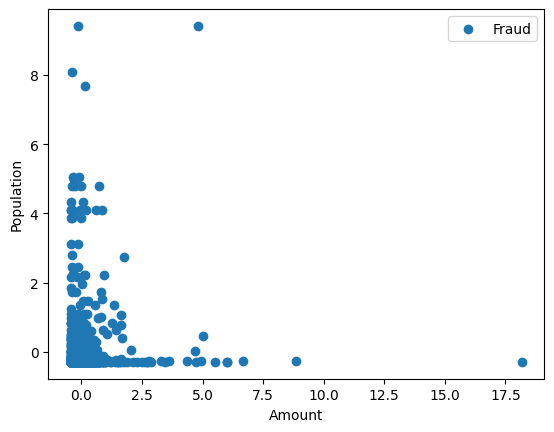

In [163]:
#plt.scatter(raw_temp_log[raw_temp_log["is_fraud"] == 0]["amt"], raw_temp_log[raw_temp_log["is_fraud"] == 0]["city_pop"])
plt.scatter(raw_temp_log[raw_temp_log["is_fraud"] == 1]["amt"], raw_temp_log[raw_temp_log["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.show()

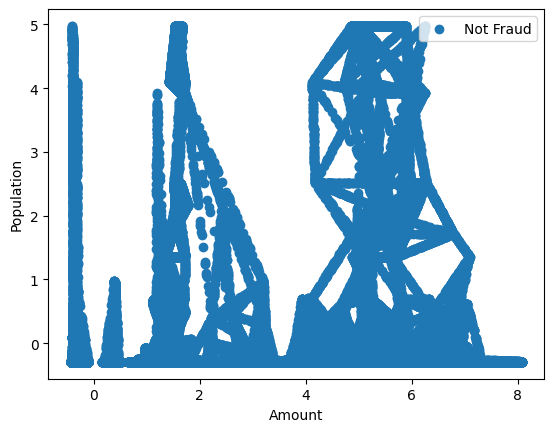

In [164]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])
plt.scatter(raw_temp_smote[raw_temp_smote["is_fraud"] == 1]["amt"], raw_temp_smote[raw_temp_smote["is_fraud"] == 1]["city_pop"])
plt.legend(["Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others? i.e. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why (test on Holdout)

In [165]:
resampling_methods = {
    "over" : RandomOverSampler(),
    "under" : RandomUnderSampler(),
    "smote" : SMOTE()
}

model_configs = {
    "LOG" : LogisticRegression(),
    "LASSO" : LogisticRegression(penalty = "l1", C = 0.5, solver= 'liblinear'),
         #C is the inverse of our alpha almost
   "DecisionTree" : DecisionTreeClassifier()
}

In [166]:
# #Define Function to Calculate Performance Metrics
def calc_perf_metrics (y_true,y_pred) :
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return sensitivity, specificity, precision, recall, f1

In [167]:
trained_models = {}
results = {}

for resample_key,resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)

    for model_name, model in model_configs.items():
        combined_key = f"{resample_key}_{model_name}"

        trained_models[combined_key] = model.fit(resample_X, resample_y)

        Y_pred = trained_models[combined_key].predict(X_holdout)

        perf_metrics = calc_perf_metrics(y_true, Y_pred)
        results[combined_key] = perf_metrics

In [168]:
#Output Results
results = pd.DataFrame(results, index = ['sensitivity', 'specificity', 'precision', 'recall', 'f1_Score']).transpose()
results

,sensitivity,specificity,precision,recall,f1_Score
over_LOG,0.089080,0.920070,0.004650,0.089080,0.008839
over_LASSO,0.089080,0.920166,0.004656,0.089080,0.008850
over_DecisionTree,0.002874,0.996410,0.003344,0.002874,0.003091
under_LOG,0.106322,0.909348,0.004893,0.106322,0.009355
under_LASSO,0.103448,0.912998,0.004960,0.103448,0.009466
under_DecisionTree,0.057471,0.944043,0.004287,0.057471,0.007979
smote_LOG,0.089080,0.920504,0.004676,0.089080,0.008885
smote_LASSO,0.089080,0.920516,0.004676,0.089080,0.008886
smote_DecisionTree,0.005747,0.990206,0.002454,0.005747,0.003439


In this case, we see very similar performance across all log and LASSO models, even across the different resampling techniques. In particular, we would typically want to use F1 score as our evaluation metric when it comes to unbalanced data, and we can see that either the Log or Lasso Models with the undersampling techniques seem to perform the best since they have F1 scores of approximately 0.009, as compared to the Decision Tree-based models, which have F1 scores of ~0.003 for oversampling and SMOTE, and even ~0.008 for the undersampling method. However, across all models this score is very low, so it does not appear that there is one option that significantly outperforms the other; if we had to pick one model the highest score would be for undersampling with LASSO.

In general, it seems surprising that undersampling seems to have the best F1 scores oerall though, since based on what we discussed in class, this resampling technique is generally pretty inaccurate and is not a method that we would choose often because it actually gets rid of real observations that we have in our dataset.